# SLU03 | Visualization with Pandas & Matplotlib: Exercise notebook
***

## Start by importing these packages

In [1]:
import pandas as pd
import numpy as np

# for evaluation purposes
import hashlib
from plotchecker import PlotChecker

def _hash(s):
    return hashlib.blake2b(
        bytes(str(s), encoding='utf8'),
        digest_size=5
    ).hexdigest()

def get_data(p, ax=0):
    all_x_data = []
    lines = p.axis.get_lines()
    collections = axis.collections
    if len(lines) > 0:
        all_x_data.append(np.concatenate([x.get_xydata()[:, ax] for x in lines]))
    if len(collections) > 0:
        all_x_data.append(np.concatenate([x.get_offsets()[:, ax] for x in collections]))
    return np.concatenate(all_x_data, axis=0)

In this notebook you will practice the following:

- Basics of Matplotlib
- Scatter plots
- Line charts
- Bar/column charts
- Histograms
- Box plots

To learn about data visualization, we are going to use a **modified version** of [Zomato Bangalore Restaurants](https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants) which has information about restaurants

The dataset is located at `data/zomato.csv`, and has the following fields:


>**`name`**: Restaurant name.  
>**`vote_rate`**: Average rating in zomato.  
>**`vote_count`**: Number of votes in zomato.  
>**`location`**: Location where the restaurant is based.  
>**`type`**: Restaurant type.  
>**`cuisine`**: Restaurant main dish cuisine type.  
>**`cost_2pax`**: Approximate meal-cost for 2 people (in $).  


In [2]:
restaurants = pd.read_csv("data/zomato.csv")

In [3]:
restaurants.shape

(41244, 7)

In [4]:
restaurants.head()

,name,vote_rate,vote_count,location,type,cuisine,cost_2pax
0,jalsa,4.1,775,banashankari,casual dining,north indian,800.0
1,spice elephant,4.1,787,banashankari,casual dining,chinese,800.0
2,san churro cafe,3.8,918,banashankari,cafe,cafe,800.0
3,addhuri udupi bhojana,3.7,88,banashankari,quick bites,south indian,300.0
4,grand village,3.8,166,basavanagudi,casual dining,north indian,600.0


***
## Exercise 1

First, import matplotlib, pyplot and the matplotlib inline ✨magic✨. 

In [5]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
assert plt, "Did you import module pyplot from matplotlib and called it plt?"

print('--- Success ---')

--- Success ---


And, change the default chart size to 12 inches width and 12 inches height

In [7]:
# YOUR CODE HERE
plt.rcParams["figure.figsize"] = [12, 12]

In [8]:
s = [plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]]
s.sort()

assert _hash(s) in ['9b75178bbe', 'e139d197c5'], "Did you change the default figure sizes?"

print('--- Success ---')

--- Success ---


<hr>

## 🛑 Important note about the grading

**Grading plots is difficult**, we are using `plotchecker` to grade the plots with `nbgrader`. 
For `plotchecker` to work with `nbgrader`, **we need to add on each cell**, the line

> **`axis = plt.gca();`**

**After the code required** to do the plot.

<div class="alert alert-danger">
    ⚠️ <b>NOTE: </b>If you get the <b>ImportError</b>, <i>plotchecker not defined</i>, make sure you activate the right environment for this unit!
</div>

> **For example**, *if we want to plot a `scatter plot` showing the relationship between **`cost for 2 people`** and **`vote rating`** among the restaurants we would do as follows:*

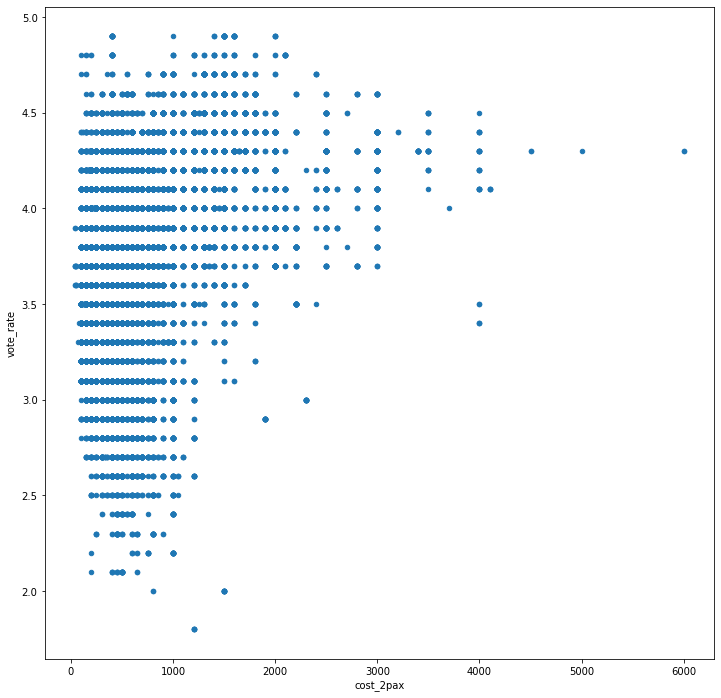

In [9]:
# code required to plot
restaurants.plot.scatter(x="cost_2pax", y="vote_rate")

# last line in the cell required to "capture" the cell and being able to grade it with nbgrader
axis = plt.gca();

***

## Exercise 2

Let's see how does the **`cost for 2 people`** correlate with the **`number of votes`**?

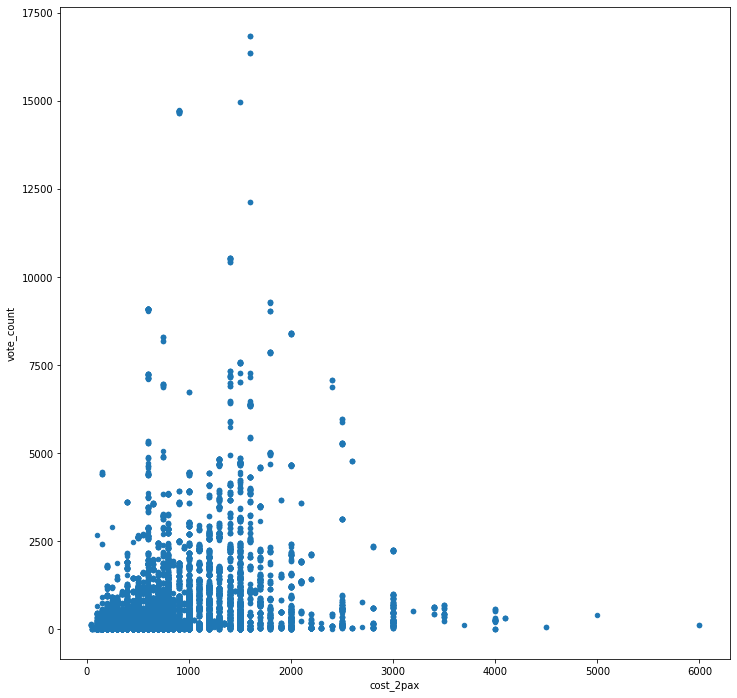

In [10]:
# YOUR CODE HERE
restaurants.plot.scatter(x="cost_2pax", y="vote_count")

axis = plt.gca();

In [11]:
pc = PlotChecker(axis)
data = get_data(pc)
l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(len(data)) == '4b7eb88930', "Did you set the right variables for the plot axes?"
assert _hash(l) in ['d1ed203167'], "Did you set the right variables for the plot axes?"
assert _hash(get_data(pc,1)) in ['676a41f8f7', '68f9b6d00d'], "Did you set the right variables for the plot axes?"

print('--- Success ---')

--- Success ---


## Exercise 3

How the average **`cost for 2 people`** are trending through the **`rating votes`**?

- set the plot **title** to **`Average Restaurant cost by Rating`**.
- label the **x-axis** as **`Zomato Ratings`**.
- label the **y-axis** as **`Restaurant Cost (2pax)`**.

<div class="alert alert-info">
    To calculate the average cost by restaurant rating we need to perform an <b><a href='https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html'>aggregation</a></b>, pandas support this by doing a technique called <b><a href='(https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html'>Split-Apply-Combine</a></b>. <b>This will be explained in the Data Wrangling Specialization.</b> For now we will do the grouping for you:
</div>

In [12]:
avg_cost_2pax_by_rating = restaurants.groupby("vote_rate")["cost_2pax"].mean().reset_index()
avg_cost_2pax_by_rating.columns = ["rating", "avg_cost_2pax"]
avg_cost_2pax_by_rating.head()

,rating,avg_cost_2pax
0,1.8,1200.000000
1,2.0,1372.727273
2,2.1,475.000000
3,2.2,828.846154
4,2.3,578.431373


<div class="alert alert-warning">
⚠️ <b>NOTE: </b>Make sure you use the dataframe named <b>avg_cost_2pax_by_rating</b> for the exercise
</div>

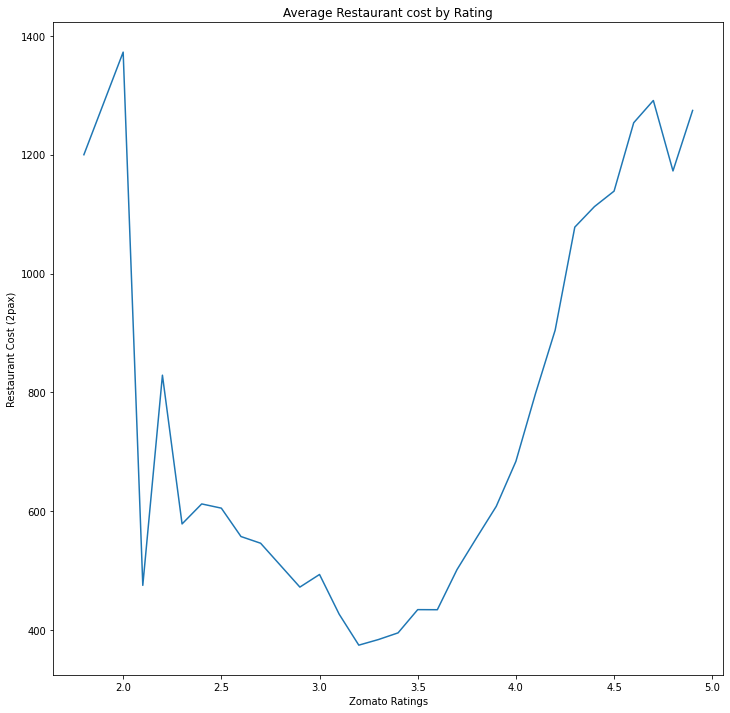

In [13]:
# YOUR CODE HERE
indexed_data = avg_cost_2pax_by_rating.set_index('rating')
indexed_data.avg_cost_2pax.plot()

# display a title
plt.title("Average Restaurant cost by Rating")

# change the label on the x axis
plt.xlabel("Zomato Ratings")

# change the label in the y axis
plt.ylabel("Restaurant Cost (2pax)")

axis = plt.gca();

In [14]:
pc = PlotChecker(axis)
l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(sorted(get_data(pc))) in ['bc499f7725'], "Did you set the right variables for the plot axes?"
assert _hash(sorted(get_data(pc,1))) in ['1062114291'], "Did you set the right variables for the plot axes?"
assert _hash(pc.title) in ['b9c481c4ef'], "Did you set the right plot title?"
assert _hash(l) in ['640d7ee8aa'], "Did you set the right plot axes?"

print('--- Success ---')

--- Success ---


## Exercise 4

How does the median **`number of votes`** vary by restaurant **`type`**? 

- label the **x-axis** as **`Number of Votes`**.
- label the **y-axis** as **`Restaurant Type`**.
- change the **plot color** to **`chocolate`**.

Again, we will do the **grouping** for you:

In [15]:
median_votes_by_type = restaurants.groupby("type")["vote_count"].median().reset_index()
median_votes_by_type.columns = ["type", "median_votes"]
median_votes_by_type

,type,median_votes
0,bakery,29
1,bar,190
2,beverage shop,31
3,bhojanalya,7
4,cafe,124
5,casual dining,215
6,club,707
7,confectionery,6
8,delivery,41
9,dessert parlor,69


<div class="alert alert-warning">
⚠️ <b>NOTE: </b>Make sure you use the dataframe named <b>median_votes_by_type</b> for the exercise
</div>

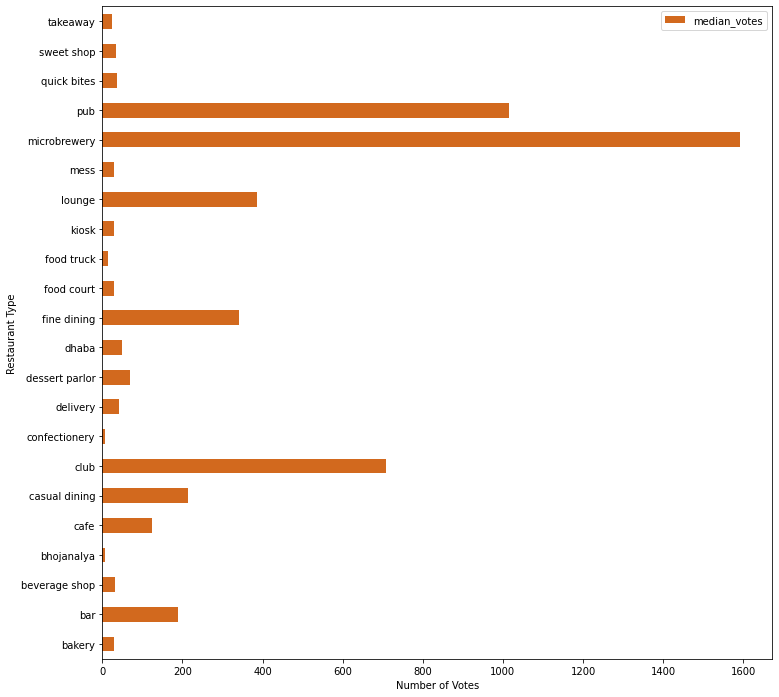

In [16]:
# YOUR CODE HERE
median_votes_by_type.plot.barh(x="type", y="median_votes", color="chocolate");

# change the label on the x axis
plt.xlabel("Number of Votes")

# change the label in the y axis
plt.ylabel("Restaurant Type")

axis = plt.gca();

In [17]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]

pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])

l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(len(pc._patches)) in ['1cb85c3d73'], "Did you set the right categorical variable and the right plot type?"
#assert _hash(np.sort(pc.widths)) in ['8f9f8c51a9'], "Did you set the right categorical variable and the right plot type?"
assert _hash(l) in ['bcd1693b58'], "Did you set the right plot axes?"
assert _hash([pc._patches[i].get_facecolor() for i,n in enumerate(pc._patches)]) == '1fe2bb456d', "Did you change the plot color?"

print('--- Success ---')

--- Success ---


In [18]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]

pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])

l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(len(pc._patches)) in ['1cb85c3d73'], "Did you set the right categorical variable and the right plot type?"
assert _hash(np.sort(pc.widths)) in ['8f9f8c51a9'], "Did you set the right categorical variable and the right plot type?"
assert _hash(l) in ['bcd1693b58'], "Did you set the right plot axes?"
assert _hash([pc._patches[i].get_facecolor() for i,n in enumerate(pc._patches)]) == '1fe2bb456d', "Did you change the plot color?"

print('--- Success ---')

--- Success ---


## Exercise 5

How does the average **`number of votes`** compares by the **`rating`**? 

- label the **x-axis** as **`Zomato rating`** and **size** **`20`**.
- label the **y-axis** as **`Number of Votes`** and **size** **`20`**.
- set the plot **title** to **`Average number of votes comparison by Rating`** and **size** **`25`**.

Doing the **grouping** for you:

In [19]:
avg_vote_by_rating = restaurants.groupby("vote_rate")["vote_count"].mean().reset_index()
avg_vote_by_rating.columns = ["rating", "avg_votes"]
avg_vote_by_rating

,rating,avg_votes
0,1.8,224.600000
1,2.0,371.909091
2,2.1,296.500000
3,2.2,285.961538
4,2.3,184.215686
5,2.4,147.181818
6,2.5,157.640000
7,2.6,112.819277
8,2.7,114.138614
9,2.8,120.222414


<div class="alert alert-warning">
⚠️ <b>NOTE: </b>Make sure you use the dataframe named <b>avg_vote_by_rating</b> for the exercise
</div>

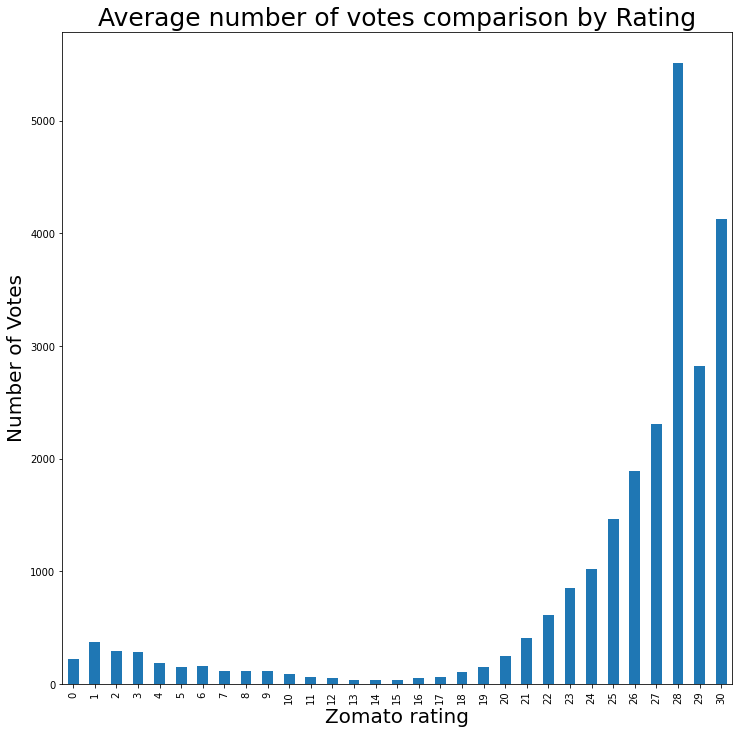

In [20]:
# YOUR CODE HERE
avg_vote_by_rating['avg_votes'].plot.bar()

# display a title
plt.title("Average number of votes comparison by Rating", size=25)

# change the label on the x axis
plt.xlabel("Zomato rating", size=20)

# change the label in the y axis
plt.ylabel("Number of Votes", size=20)

axis = plt.gca();

In [21]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]

pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])

l = [pc.xlabel] + [pc.ylabel]
l.sort()

assert _hash(len(pc._patches)) in ['d15bce6d7d'], "Did you set the right variable and the right plot type?"
assert _hash(np.sort(pc.widths)) in ['1050369a36'], "Did you set the right variable and the right plot type?"
assert _hash(np.sort(pc.heights)) in ['51713c2dfb'], "Did you set the right variable and the right plot type?"
assert _hash(pc.title) in ['3db42086ff'], "Did you set the right plot title?"
assert _hash(l) in ['ce43ba93aa'], "Did you set the right plot axes?"

print('--- Success ---')

--- Success ---


## Exercise 6

How is the variable **`vote_rate`** distributed through the better ratings? 
- show only restaurants with a minimum rating of **4 points** (up to 5 points). 
> 💡 **hint:** _set a limit_ 
- change the number of **bins to 30**.
- change the **plot color** to **`yellowgreen`**.

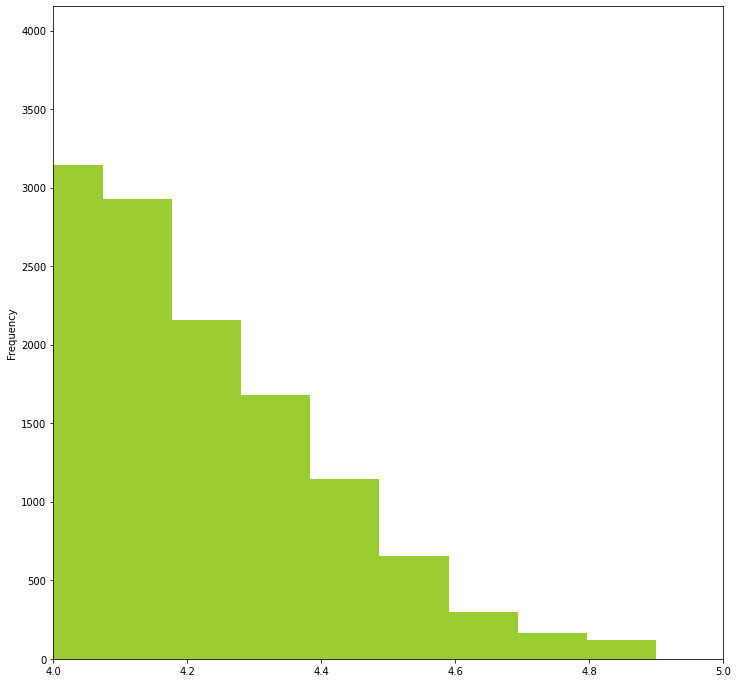

In [22]:
# YOUR CODE HERE

restaurants.vote_rate.plot.hist(xlim=(4,5), bins=30, color="yellowgreen");

axis = plt.gca();

In [23]:
pc = PlotChecker(axis)
pc._patches = np.array(pc.axis.patches)
pc._patches = pc._patches[np.argsort([p.get_x() for p in pc._patches])]
pc.widths = np.array([p.get_width() for p in pc._patches])
pc.heights = np.array([p.get_height() for p in pc._patches])

assert _hash(np.sort(pc.widths)) in ['1717c26bdc'], "Did you set the right plot type? You should not change the dataset."
assert _hash(np.sort(pc.heights)) in ['93b03e2bf6'], "Did you set the right plot type? You should not change the dataset."
assert _hash(pc.xlim[0]) == '8599ebffc2', "Did you set the right limit?"
assert _hash(pc.xlim[1]) == 'f24d02e0e6', "Did you set the right limit?"
assert _hash([pc._patches[i].get_facecolor() for i,n in enumerate(pc._patches)]) == '697422ff42', "Did you change the plot color?"

print('--- Success ---')

--- Success ---


## Exercise  7

Now, we will analyze the restaurants of Chinese food and compare them between the rating and the cuisine type of those restaurants. Following the steps below:

- filter the **`restaurants`** dataset by **chinese** **`cuisine`**.
- save them in a new **dataframe** called **`chinese_restaurants`**.
- make a plot that displays the **rating** by chinese restaurant **type** and that allows us to check if there are outliers.
- change the default **plot style** to **`seaborn`**.
- set the plot argument **vert** to **`False`**.
- set the plot argument **figsize** to **`10`** inches width and **`10`** inches height.
- set the plot argument **grid** to **`False`**
- set the plot argument **fontsize** to **`14`**

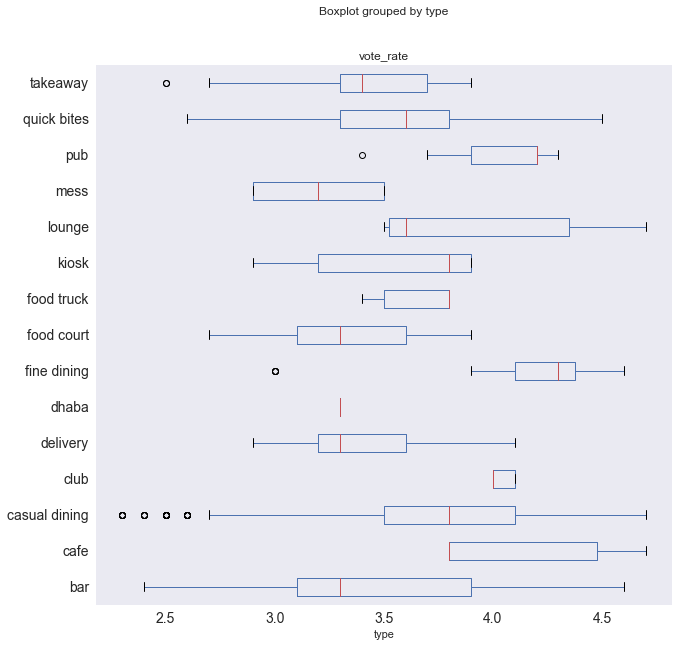

In [24]:
# YOUR CODE HERE
plt.style.use('seaborn')
chinese_restaurants = restaurants[restaurants.cuisine == 'chinese']
chinese_restaurants.boxplot(column="vote_rate", by="type", vert=False, figsize=[10,10], grid=False, fontsize=14)

axis = plt.gca();

In [25]:
pc = PlotChecker(axis)
pc._lines = pc.axis.get_lines()
pc.colors = np.array([pc._color2rgb(x.get_color()) for x in pc._lines])

assert _hash(chinese_restaurants['cuisine'].unique()) in ['3c110a6b03'], "Did you filter the chinese restaurtants?"
assert _hash(pc.colors[0]) in ['e68950262e'], "Did you set the right plot style?"
assert _hash(pc.yticklabels) in ['474e6af7df'], "Did you select the right categorical variable for the plot?"
assert _hash(pc.xticklabels) in ['f50b6dfe86'], "Did you select the right categorical variable for the plot?"

print('--- Success ---')

--- Success ---



# 🏁 Ungraded Exercise 🏁
Load the file misterious_data.csv and use data visualization to answer the following questions:

* How is the distribution of **x** in general?
* Are there any **outlier** in any of the fields?
* Which **2 charts** better represent the underlying data?
* Change their **style** to **`bmh`**.
* Add **titles** to each chart explaining them.


In [26]:
misterious = pd.read_csv("data/misterious_data.csv")
misterious.head()

,category,x,y
0,1,55.3846,97.1795
1,1,51.5385,96.0256
2,1,46.1538,94.4872
3,1,42.8205,91.4103
4,1,40.7692,88.3333


<AxesSubplot:title={'center':'x'}, xlabel='category'>

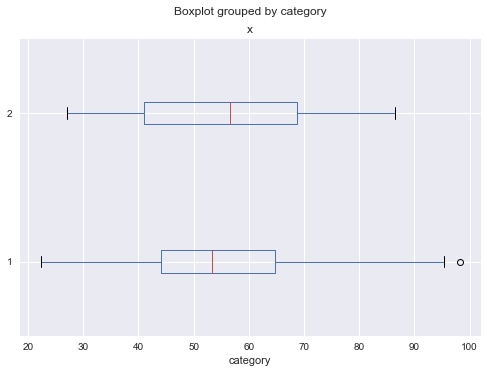

In [27]:
misterious.boxplot(column="x", by="category", vert=False)

<AxesSubplot:title={'center':'y'}, xlabel='category'>

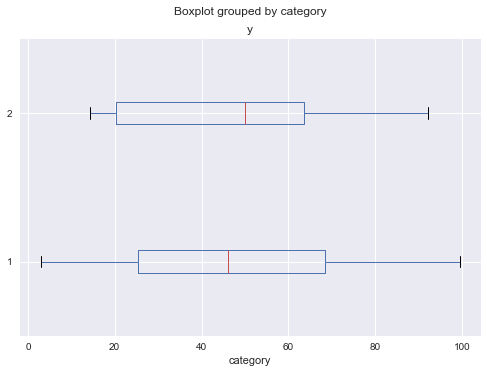

In [28]:
misterious.boxplot(column="y", by="category", vert=False)

<AxesSubplot:xlabel='x', ylabel='y'>

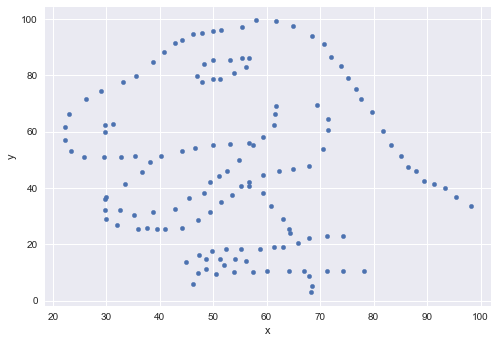

In [29]:
misterious[misterious.category == 1].plot.scatter(x='x', y='y')

<AxesSubplot:xlabel='x', ylabel='y'>

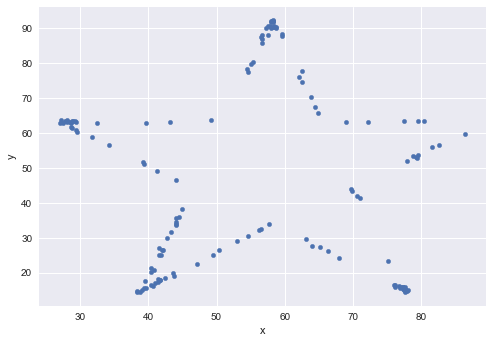

In [30]:
misterious[misterious.category == 2].plot.scatter(x='x', y='y')